In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import os
from matplotlib.lines import Line2D

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 同一フォルダ内のCSVファイルの名前を取得する関数
def get_csv_files_in_same_folder(path):
    """
    同一フォルダ内のCSVファイルの名前を取得する関数

    Parameters:
        - path (str): ファイルが存在するディレクトリのパス

    Returns:
        - list of str: CSVファイルの名前のリスト
    """
    # 現在のノートブックのディレクトリを取得
    notebook_directory = os.path.dirname(os.path.abspath(path))
    # フォルダ内のファイル一覧を取得
    files = os.listdir(notebook_directory)

    # CSVファイルのみを抽出
    csv_files = [file for file in files if file.endswith(".csv")]
    # CSVファイルの名前を出力
    return csv_files

# CSVファイルを読み込む関数
def read_csv(csv_files_list):
    """
    複数のCSVファイルを読み込んで、それぞれのデータフレームをリストとして返す関数

    Parameters:
        - csv_files_list (list of str): 読み込むCSVファイルの名前のリスト

    Returns:
        - list of pd.DataFrame: 読み込まれたCSVファイルのデータフレームのリスト
    """
    # ファイル名を保存する配列を作成（最低限の大きさで初期化）
    file_names_array = [None] * len(csv_files_list)

    # 配列にファイル名を格納
    for i, csv_file in enumerate(csv_files_list):
        file_names_array[i] = csv_file
    
    # CSVの読み込み
    read_df = [0] * len(file_names_array)
    for i in range(len(file_names_array)):
        read_df[i] = pd.read_csv(file_names_array[i], encoding="Shift-JIS")

    return read_df

# グラフをプロットする関数
def ploter(df_, x_line=0, y_line=1, title='default', data=1, hit_number=0, shot_number=0, hit_flag=False):
    """
    複数のCSVファイルから特定の列のデータをプロットし、的中数や的中率などを表示する関数

    Parameters:
        - df_ (list of pd.DataFrame): 複数のCSVファイルから読み込まれたデータフレームのリスト
        - x_line (int): X軸に使用する列の番号
        - y_line (int): Y軸に使用する列の番号
        - title (str): グラフのタイトル
        - data (int): プロットするデータの列の番号
        - hit_number (int): 的中数
        - shot_number (int): 射数
        - hit_flag (bool): 的中のフラグ

    Returns:
        None
    """
    # 変数の初期化
    hit_color = "#0000FF"
    no_hit_color = "#FF0000"
    font_size = 12
    font_family = 'MS Gothic'
    figsize = (16, 4)
    line_width = 1
    rotation = 0
    HIT = '的中'
    hit_flag = True

    # グラフの設定
    title = title
    xlabel = "Time(sec)"
    ylabel = '所作角度（°）'
    
    plt.rcParams["font.size"] = font_size
    plt.rcParams["font.family"] = font_family
    plt.rcParams["figure.figsize"] = figsize

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)

    plt.xlim()
    plt.ylim()

    # 各csvファイルを参照する
    for i in range(len(df_)):
        shot_number += 1
        # i番目のcsvを格納
        df = df_[i]

        # i番目のcsvのHITの判定
        if df[HIT][0] == 1:
            hit_number += 1
            hit_flag = True

        elif df[HIT][0] == 0:
            hit_number = hit_number
            hit_flag = False

        else:
            print("errer")
        # i番目のcsvのN番目のカラムをプロット

        # 当たった場合:True
        if hit_flag == True:

            # 当たった時のグラフ
            plt.plot(df[df.columns[0]]/1000, df[df.columns[data]], color=hit_color, linewidth=line_width, label=HIT)
            
        elif hit_flag == False:

            # 外れた時のグラフ
            plt.plot(df[df.columns[0]]/1000, df[df.columns[data]], color=no_hit_color, linewidth=line_width, label='no' + HIT)

        else:
            print("plot errer")
            
    print("射数:" + str(shot_number))
    print("的中数:" + str(hit_number))
    print("的中率:" +  str((hit_number / shot_number)*100) + "%")
    # 凡例を2つだけ表示する
    # 凡例のカスタム作成
    legend_elements = [Line2D([0], [0], color=hit_color, lw=line_width, label='的中'),
                    Line2D([0], [0], color=no_hit_color, lw=line_width, label='非的中')]
    #凡例の表示
    plt.legend(handles=legend_elements)

    plt.grid()
    plt.show()


射数:20
的中数:15
的中率:75.0%


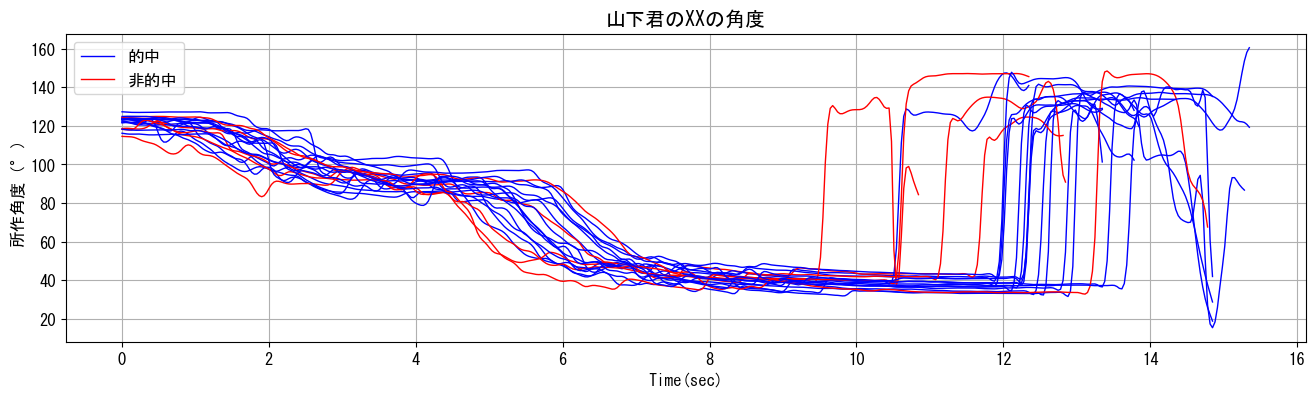

In [15]:
path = r"C:\Users\ginnt\OneDrive\デスクトップ\山下\所作解析テスト\kinovea解析.ipynb"

csv_files_list = get_csv_files_in_same_folder(path)
df = read_csv(csv_files_list)
ploter(df,x_line=0,y_line=1,title="山下君のXXの角度",hit_flag=False)